In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)

In [4]:
oe = OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value = -1,dtype=np.int64)
irisdata.Class = oe.fit_transform(irisdata.loc[:, ['Class']])

In [5]:
irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
#getting values of x and y 
X,y= irisdata.drop(['Class'],axis=1), irisdata['Class']

In [8]:
#spplitting the dataset 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2,random_state=0,stratify=y)

In [10]:
#Data preprocessing 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


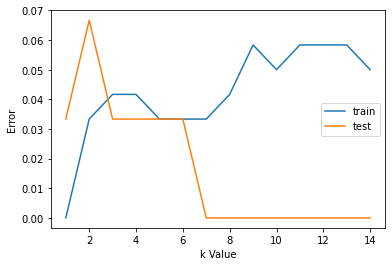

In [12]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


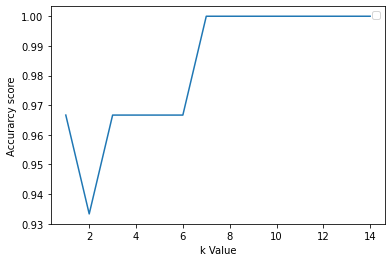

In [13]:
acc_score= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_score.append(acc)
# plt.figure(figsize(10,5))
plt.plot(range(1,15),acc_score)
plt.xlabel('k Value')
plt.ylabel('Accurarcy score')
plt.legend()

In [17]:
#
knn_7= KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

1.0